In [181]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



In [182]:
#Read in data frame

df_results = pd.read_csv("Resources/results.csv")

In [183]:
#See results of dataframe

df_results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25455,25461,1076,849,3,6,18,16,16,16,0.0,57,\N,\N,49,18,1:23.882,226.518,11
25456,25462,1076,4,214,14,10,17,17,17,0.0,57,\N,\N,57,2,1:20.846,235.024,11
25457,25463,1076,830,9,1,2,\N,R,18,0.0,38,\N,\N,37,6,1:21.677,232.633,9
25458,25464,1076,20,117,5,17,\N,R,19,0.0,22,\N,\N,17,19,1:25.189,223.042,3


In [184]:
[i for i in df_results.columns.values if i.find("Id") > 0] #check all that have "Id"

['resultId', 'raceId', 'driverId', 'constructorId', 'statusId']

In [185]:
df_results.isna().sum()

resultId           0
raceId             0
driverId           0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
dtype: int64

In [186]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25460 entries, 0 to 25459
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25460 non-null  int64  
 1   raceId           25460 non-null  int64  
 2   driverId         25460 non-null  int64  
 3   constructorId    25460 non-null  int64  
 4   number           25460 non-null  object 
 5   grid             25460 non-null  int64  
 6   position         25460 non-null  object 
 7   positionText     25460 non-null  object 
 8   positionOrder    25460 non-null  int64  
 9   points           25460 non-null  float64
 10  laps             25460 non-null  int64  
 11  time             25460 non-null  object 
 12  milliseconds     25460 non-null  object 
 13  fastestLap       25460 non-null  object 
 14  rank             25460 non-null  object 
 15  fastestLapTime   25460 non-null  object 
 16  fastestLapSpeed  25460 non-null  object 
 17  statusId    

In [187]:
drop_columns = ['resultId', 'raceId', "position","positionText", "time", "fastestLapTime", "rank","fastestLapSpeed"]
df_results.drop(drop_columns, axis=1,inplace= True)

In [188]:
for i in df_results.columns.values:
    print(i)
    print(df_results[i].unique())
    print("*******")
    print()

driverId
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  56
  63  62  59  66  54  55  57  58  60  61  64  65  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 110
 109 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 135 136 137 138 139 133 140 141 142 143 144 145 146
 147 148 151 149 150 152  67 153 154 155 156 157 158 159 163 160 161 162
 164 134 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 206 201 202 203 204 205 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 2

In [189]:
df_results["driverId"].isna().sum()

0

In [190]:
#Clean Data

df_results = df_results.replace(r"\N",-1)
df_results

,driverId,constructorId,number,grid,positionOrder,points,laps,milliseconds,fastestLap,statusId
0,1,1,22,1,1,10.0,58,5690616,39,1
1,2,2,3,5,2,8.0,58,5696094,41,1
2,3,3,7,7,3,6.0,58,5698779,41,1
3,4,4,5,11,4,5.0,58,5707797,58,1
4,5,1,23,3,5,4.0,58,5708630,43,1
...,...,...,...,...,...,...,...,...,...,...
25455,849,3,6,18,16,0.0,57,-1,49,11
25456,4,214,14,10,17,0.0,57,-1,57,11
25457,830,9,1,2,18,0.0,38,-1,37,9
25458,20,117,5,17,19,0.0,22,-1,17,3


In [191]:
df_results = df_results.apply(lambda x: pd.to_numeric(x), axis=1)

In [192]:
df_results['milliseconds'] = df_results['milliseconds'] / 1000 / 60 / 60
df_results.rename(columns = {"milliseconds":"minutes"})
df_results

,driverId,constructorId,number,grid,positionOrder,points,laps,milliseconds,fastestLap,statusId
0,1.0,1.0,22.0,1.0,1.0,10.0,58.0,1.580727e+00,39.0,1.0
1,2.0,2.0,3.0,5.0,2.0,8.0,58.0,1.582248e+00,41.0,1.0
2,3.0,3.0,7.0,7.0,3.0,6.0,58.0,1.582994e+00,41.0,1.0
3,4.0,4.0,5.0,11.0,4.0,5.0,58.0,1.585499e+00,58.0,1.0
4,5.0,1.0,23.0,3.0,5.0,4.0,58.0,1.585731e+00,43.0,1.0
...,...,...,...,...,...,...,...,...,...,...
25455,849.0,3.0,6.0,18.0,16.0,0.0,57.0,-2.777778e-07,49.0,11.0
25456,4.0,214.0,14.0,10.0,17.0,0.0,57.0,-2.777778e-07,57.0,11.0
25457,830.0,9.0,1.0,2.0,18.0,0.0,38.0,-2.777778e-07,37.0,9.0
25458,20.0,117.0,5.0,17.0,19.0,0.0,22.0,-2.777778e-07,17.0,3.0


In [193]:
df_results["milliseconds"] = df_results["milliseconds"].apply(lambda x:round(x,2))

In [194]:
df_results.columns

Index(['driverId', 'constructorId', 'number', 'grid', 'positionOrder',
       'points', 'laps', 'milliseconds', 'fastestLap', 'statusId'],
      dtype='object')

In [195]:
#Check and convert DataTypes

df_results.dtypes


driverId         float64
constructorId    float64
number           float64
grid             float64
positionOrder    float64
points           float64
laps             float64
milliseconds     float64
fastestLap       float64
statusId         float64
dtype: object

In [196]:
# Select Features and Targets

y = df_results["positionOrder"]
X = df_results.drop(columns="positionOrder")
y.shape

(25460,)

In [197]:
#Begin scaling and training data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

from sklearn.preprocessing import StandardScaler

std = StandardScaler().fit(X_train)
# transform train data
x_train_std = std.transform(X_train)
# transform test data
x_test_std = std.transform(X_test)

X_train.shape

(19095, 9)

In [198]:
lr = LogisticRegression(solver='sag')
dt = DecisionTreeClassifier()
rn = RandomForestClassifier()
knn = KNeighborsClassifier()
gb = GaussianNB()
sgd = SGDClassifier()

In [199]:
li = [lr,sgd,rn,knn,gb,dt]
dic = {}
for i in li:
    i.fit(x_train_std,y_train)
    ypred = i.predict(x_test_std)
    print(i,":",accuracy_score(ypred,y_test)*100)
    dic.update({str(i):i.score(x_test_std,y_test)*100})

C:\Users\triba\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(solver='sag') : 25.530243519245875
SGDClassifier() : 12.270227808326787
RandomForestClassifier() : 38.35035349567949
KNeighborsClassifier() : 27.88688138256088
GaussianNB() : 7.022780832678712
DecisionTreeClassifier() : 36.229379418696


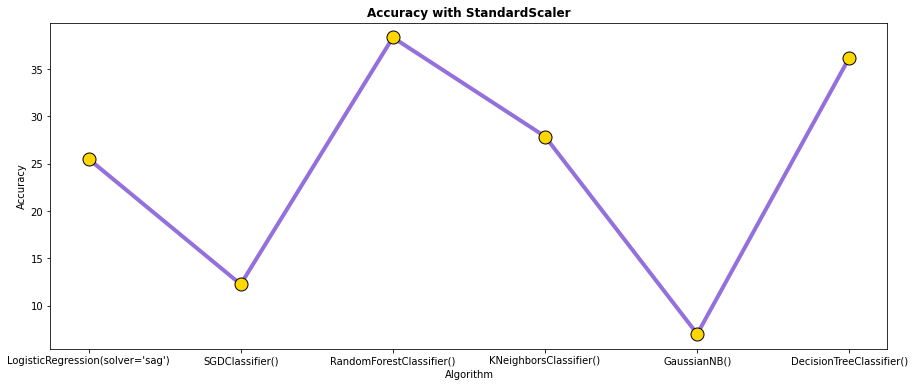

In [200]:
plt.figure(figsize=(15, 6))
plt.title("Accuracy with StandardScaler", fontweight='bold')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(dic.keys(),dic.values(),marker='o',color='mediumpurple',linewidth=4,markersize=13,
         markerfacecolor='gold',markeredgecolor='black')
plt.show()


In [201]:
#Make linear regression prediction using StandardScaler

predictions = lr.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(20)

C:\Users\triba\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,Prediction,Actual
0,10.0,16.0
1,10.0,9.0
2,10.0,10.0
3,8.0,11.0
4,7.0,1.0
5,10.0,9.0
6,8.0,12.0
7,10.0,10.0
8,14.0,24.0
9,8.0,10.0


In [202]:
#Make SGDClassifier prediction using StandardScaler

predictions = sgd.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(20)

C:\Users\triba\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(


,Prediction,Actual
0,6.0,16.0
1,6.0,9.0
2,6.0,10.0
3,13.0,11.0
4,7.0,1.0
5,6.0,9.0
6,13.0,12.0
7,6.0,10.0
8,33.0,24.0
9,6.0,10.0


In [203]:
#Make RandomForestClassifier prediction using StandardScaler

predictions = rn.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(20)

C:\Users\triba\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,Prediction,Actual
0,5.0,16.0
1,5.0,9.0
2,5.0,10.0
3,5.0,11.0
4,4.0,1.0
5,5.0,9.0
6,5.0,12.0
7,5.0,10.0
8,5.0,24.0
9,5.0,10.0


In [204]:
#Make RandomForestClassifier prediction using StandardScaler

predictions = rn.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(20)

C:\Users\triba\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,Prediction,Actual
0,5.0,16.0
1,5.0,9.0
2,5.0,10.0
3,5.0,11.0
4,4.0,1.0
5,5.0,9.0
6,5.0,12.0
7,5.0,10.0
8,5.0,24.0
9,5.0,10.0


In [205]:
#Make DecisionTreeClassifier prediction using StandardScaler

predictions = dt.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(20)

C:\Users\triba\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


,Prediction,Actual
0,5.0,16.0
1,5.0,9.0
2,5.0,10.0
3,5.0,11.0
4,4.0,1.0
5,5.0,9.0
6,5.0,12.0
7,5.0,10.0
8,5.0,24.0
9,5.0,10.0


In [206]:
#Make GaussianNB prediction using StandardScaler

predictions = gb.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(20)

C:\Users\triba\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


,Prediction,Actual
0,14.0,16.0
1,14.0,9.0
2,14.0,10.0
3,17.0,11.0
4,4.0,1.0
5,10.0,9.0
6,17.0,12.0
7,14.0,10.0
8,14.0,24.0
9,17.0,10.0


In [207]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)
# transform training data
X_train_norm = norm.transform(X_train)
# transform testing data
X_test_norm = norm.transform(X_test)

In [208]:
li = [lr,sgd,rn,knn,gb,dt]
di = {}
for i in li:
    i.fit(X_train_norm,y_train)
    ypred = i.predict(X_test_norm)
    print(i,":",accuracy_score(ypred,y_test)*100)
    di.update({str(i):i.score(X_test_norm,y_test)*100})

LogisticRegression(solver='sag') : 16.873527101335426
SGDClassifier() : 13.197172034564023
RandomForestClassifier() : 38.3974862529458
KNeighborsClassifier() : 20.8012568735271
GaussianNB() : 6.991358994501179
DecisionTreeClassifier() : 36.276512175962296


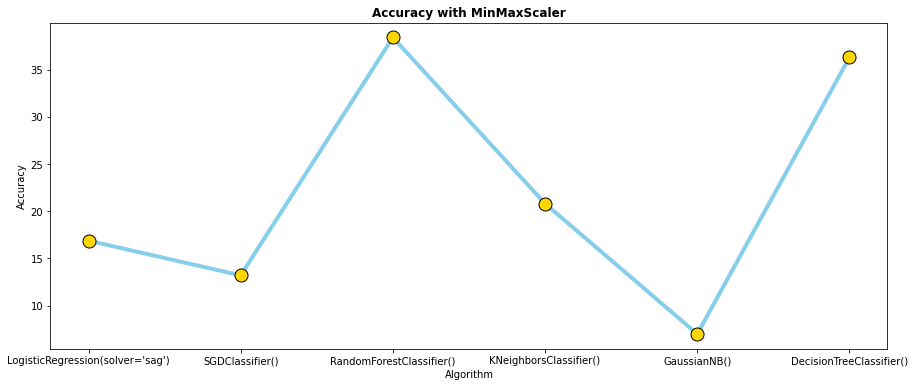

In [209]:
plt.figure(figsize=(15, 6))
plt.title("Accuracy with MinMaxScaler", fontweight='bold')
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(di.keys(),di.values(),marker='o',color='skyblue',linewidth=4,markersize=13,
         markerfacecolor='gold',markeredgecolor='black')

plt.show()


In [210]:
#Make linear regression prediction using MinMaxScaler

predictions = lr.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(20)

C:\Users\triba\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,Prediction,Actual
0,11.0,16.0
1,10.0,9.0
2,8.0,10.0
3,8.0,11.0
4,5.0,1.0
5,10.0,9.0
6,8.0,12.0
7,10.0,10.0
8,14.0,24.0
9,8.0,10.0


In [211]:
#Make SGDClassifier prediction using MinMaxScaler

predictions = sgd.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(20)

C:\Users\triba\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SGDClassifier was fitted without feature names
  warnings.warn(


,Prediction,Actual
0,18.0,16.0
1,20.0,9.0
2,7.0,10.0
3,9.0,11.0
4,5.0,1.0
5,20.0,9.0
6,9.0,12.0
7,20.0,10.0
8,27.0,24.0
9,12.0,10.0


In [212]:
#Make RandomForestClassifier prediction using MinMaxScaler

predictions = rn.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(20)

C:\Users\triba\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,Prediction,Actual
0,21.0,16.0
1,21.0,9.0
2,21.0,10.0
3,21.0,11.0
4,1.0,1.0
5,5.0,9.0
6,21.0,12.0
7,21.0,10.0
8,21.0,24.0
9,21.0,10.0


In [213]:
#Make KNeighborsClassifier prediction using MinMaxScaler

predictions = knn.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(20)

C:\Users\triba\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


,Prediction,Actual
0,16.0,16.0
1,19.0,9.0
2,1.0,10.0
3,5.0,11.0
4,15.0,1.0
5,3.0,9.0
6,19.0,12.0
7,18.0,10.0
8,19.0,24.0
9,5.0,10.0


In [214]:
#Make DecisionTreeClassifier prediction using MinMaxScaler

predictions = dt.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(20)

C:\Users\triba\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


,Prediction,Actual
0,14.0,16.0
1,14.0,9.0
2,14.0,10.0
3,14.0,11.0
4,3.0,1.0
5,1.0,9.0
6,14.0,12.0
7,14.0,10.0
8,14.0,24.0
9,14.0,10.0


In [215]:

#Make GaussianNB prediction using MinMaxScaler

predictions = gb.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(20)

C:\Users\triba\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


,Prediction,Actual
0,19.0,16.0
1,19.0,9.0
2,19.0,10.0
3,19.0,11.0
4,2.0,1.0
5,10.0,9.0
6,19.0,12.0
7,19.0,10.0
8,19.0,24.0
9,19.0,10.0
